<a href="https://colab.research.google.com/github/orizay/free-fonts/blob/master/HeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Mount Drive

In [1]:
from google.colab import drive
drive.mount('MyData',force_remount=True)

Mounted at MyData


In [1]:
!ls -al '/content/MyData/MyDrive/MyData'

total 9461806
-rw------- 1 root root    143130 Jul  3  2020  abalone_original.csv
-rw------- 1 root root      4756 Jul  7  2020  Advertising.csv
drwx------ 2 root root      4096 Aug  1  2020  All-CSV-ML-Data-Files-Download-master
-rw------- 1 root root   4052564 Apr 30 06:54  data_2020.csv
-rw------- 1 root root       728 Jul 22  2020  enrollment_forecast.csv
-rw------- 1 root root      1729 Jul 23  2020  mtcars.csv
-rw------- 1 root root 109633438 May 27 00:59  pandas-example.csv
-rw------- 1 root root   1770221 Jul 31  2020  Superstore-Sales.csv
-rw------- 1 root root 783889122 Apr 27 01:41  TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Apr 27 01:42  TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Apr 27 01:41  TCS_영업소간통행시간_1시간_1개월_202003
-rw------- 1 root root 765531937 May 12 23:59  TCS_영업소간통행시간_1시간_1개월_202004
-rw------- 1 root root 824393600 May 13 00:02  TCS_영업소간통ᄒ

# 2.korean Characters

In [3]:
!sudo apt-get install fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (45.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Import seaborn as a alias 'sns'
import seaborn as sns
sns.set()

In [4]:
plt.rc('font',family='NanumBarunGothic')

# 3. Load Data

In [5]:
import pandas as pd

In [6]:
# Load a file under 'data' folder
file = '/content/MyData/MyDrive/MyData/data_2020.csv'
data = pd.read_csv(file)

In [7]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152870 entries, 0 to 152869
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     152870 non-null  int64
 1   집계시      152870 non-null  int64
 2   출발영업소코드  152870 non-null  int64
 3   도착영업소코드  152870 non-null  int64
 4   통행시간     152870 non-null  int64
 5   요일       152870 non-null  int64
dtypes: int64(6)
memory usage: 7.0 MB


# 4.집계일자

In [9]:
data_06_22 = data[data['집계시'].isin(range(6,23))]

In [10]:
data_06_22

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
10,20200101,10,101,105,686,2
11,20200101,10,101,105,761,2
12,20200101,10,101,105,704,2
13,20200101,10,101,105,807,2
14,20200101,10,101,105,687,2
...,...,...,...,...,...,...
152861,20201231,20,101,140,17001,3
152862,20201231,6,101,115,4652,3
152864,20201231,19,101,140,16355,3
152867,20201231,6,101,110,3173,3


In [11]:
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
82028,20200715,6,101,140,16775,2
125225,20201026,6,101,110,5101,0
66049,20200609,6,101,105,713,1
66048,20200609,6,101,105,816,1
76951,20200704,6,101,135,10050,5
...,...,...,...,...,...,...
74174,20200628,22,101,105,765,6
74175,20200628,22,101,105,870,6
74176,20200628,22,101,105,849,6
107489,20200915,22,101,115,6371,1


In [12]:
data_06_22_day = data_06_22.groupby('집계일자')['도착영업소코드'].value_counts()

In [13]:
data_06_22_day

집계일자      도착영업소코드
20200101  105        96
          110        65
          115        51
          135        19
          140        19
                     ..
20201231  140        25
          120        18
          130        18
          135        18
          125        15
Name: 도착영업소코드, Length: 2919, dtype: int64

In [17]:
data_06_22_day = data_06_22.groupby('집계일자')['도착영업소코드'].value_counts().unstack().fillna(0)

In [18]:
data_06_22_day

도착영업소코드,105,110,115,120,125,130,135,140
집계일자,,,,,,,,
20200101,96.0,65.0,51.0,15.0,17.0,18.0,19.0,19.0
20200102,102.0,93.0,52.0,15.0,15.0,18.0,22.0,15.0
20200103,98.0,85.0,64.0,16.0,15.0,23.0,17.0,26.0
20200104,90.0,76.0,52.0,15.0,14.0,15.0,25.0,17.0
20200105,77.0,60.0,49.0,14.0,26.0,22.0,14.0,18.0
...,...,...,...,...,...,...,...,...
20201227,95.0,49.0,51.0,16.0,18.0,22.0,18.0,14.0
20201228,102.0,89.0,57.0,17.0,16.0,21.0,23.0,17.0
20201229,102.0,96.0,57.0,12.0,17.0,17.0,17.0,17.0


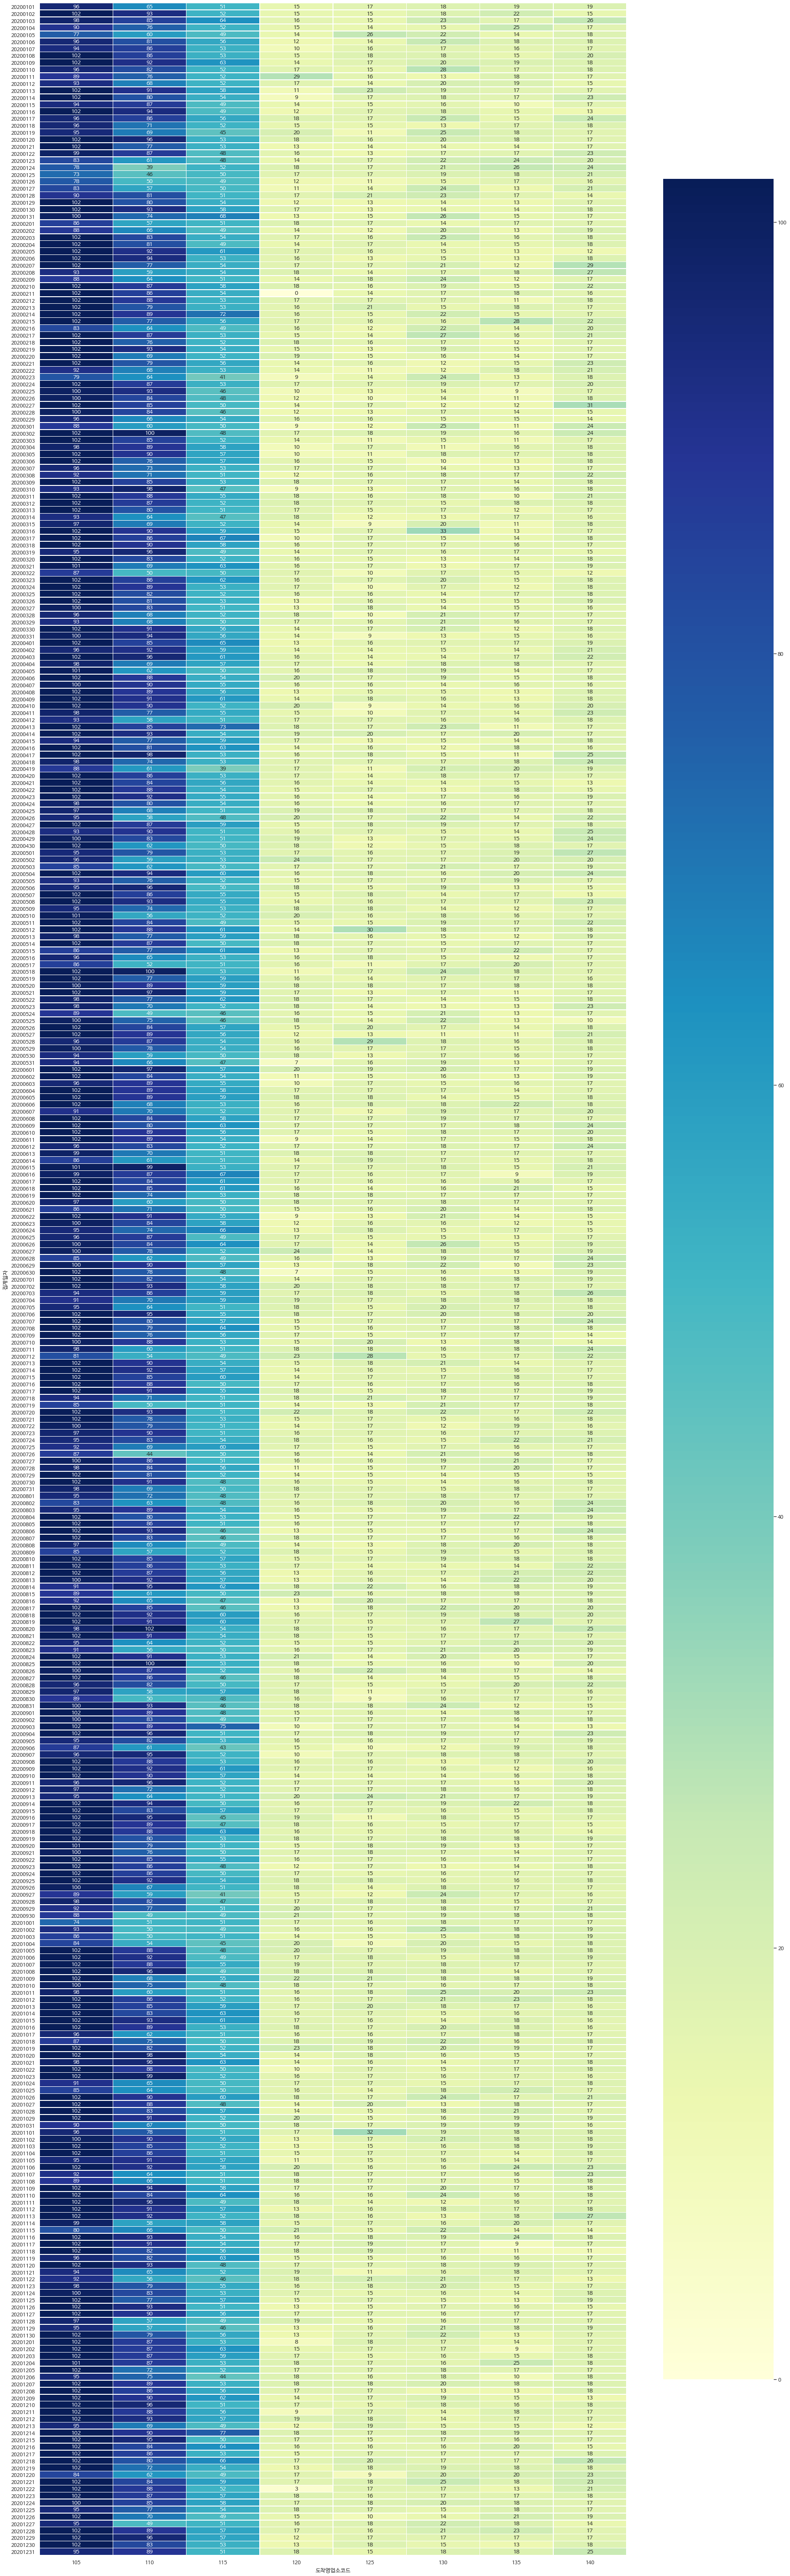

In [31]:
# Draw a heatmap with numeric values in each cell
f, ax = plt.subplots(figsize=(28,100))
sns.heatmap(data_06_22_day, annot=True, fmt= '.0f', linewidths=.5, ax=ax,cmap='YlGnBu')

# 5.집계시

In [39]:
data_06_22_time = data_06_22.groupby('집계시')['도착영업소코드'].value_counts().unstack().fillna(0)

In [40]:
data_06_22_time

도착영업소코드,105,110,115,120,125,130,135,140
집계시,,,,,,,,
6,2151,1656,1085,231,219,209,219,325
7,2155,1802,1276,309,261,244,233,334
8,2152,1899,1149,354,307,366,286,336
9,2149,1889,1139,389,336,407,340,359
10,2147,1872,1161,386,347,379,368,378
11,2137,1871,1161,381,349,391,380,389
12,2127,1876,1166,383,357,397,386,397
13,2118,1857,1159,395,368,404,387,404
14,2108,1871,1163,384,372,400,394,399


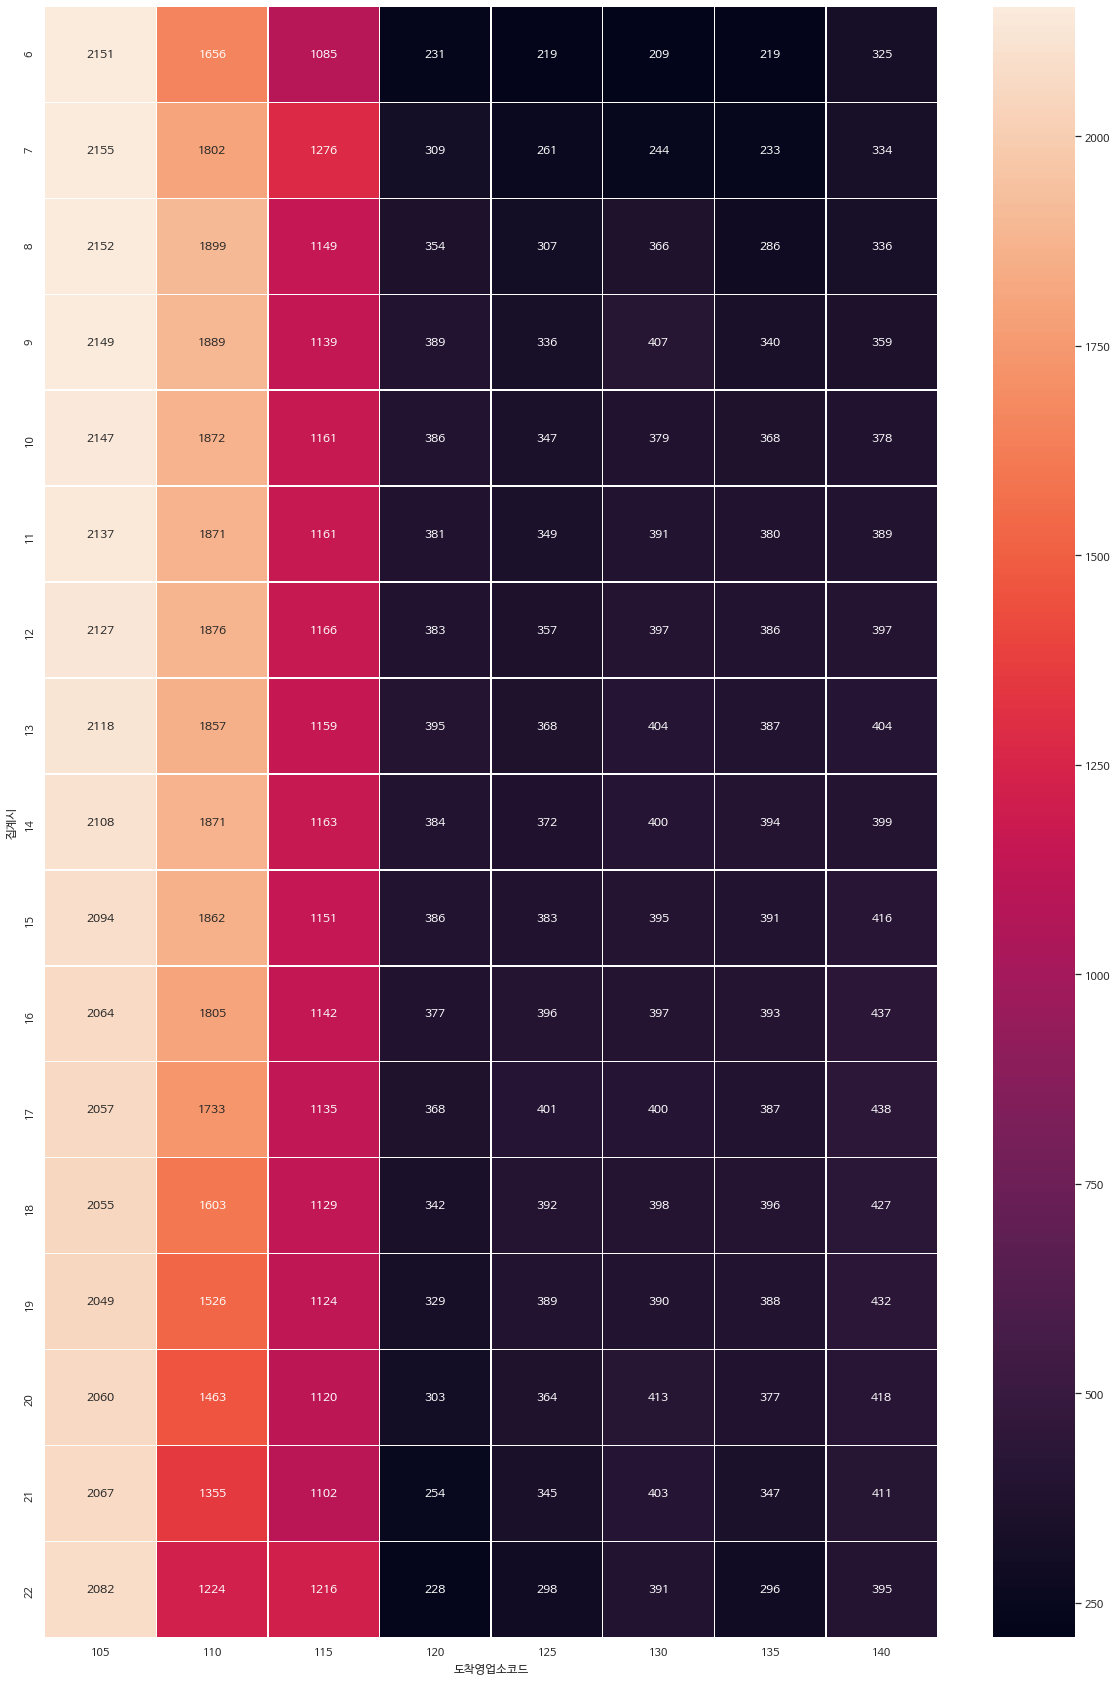

In [41]:
# Draw heatmap withh the numeric values in each cell
f, ax = plt.subplots(figsize=(20,30))
sns.heatmap(data_06_22_time, annot=True, fmt='d', linewidths=.5, ax= ax)

# 6. 요일

In [42]:
data_06_22_weekdays = data_06_22.groupby('요일')['도착영업소코드'].value_counts().unstack().fillna(0)

In [43]:
data_06_22_weekdays

도착영업소코드,105,110,115,120,125,130,135,140
요일,,,,,,,,
0,5245,4568,2843,841,876,1076,864,963
1,5230,4479,2829,733,851,845,798,943
2,5323,4504,2943,817,847,849,824,930
3,5301,4623,2875,818,845,858,871,945
4,5054,4260,2819,850,839,878,866,1007
5,4966,3522,2730,912,810,850,913,964
6,4653,3208,2539,828,816,1028,832,943


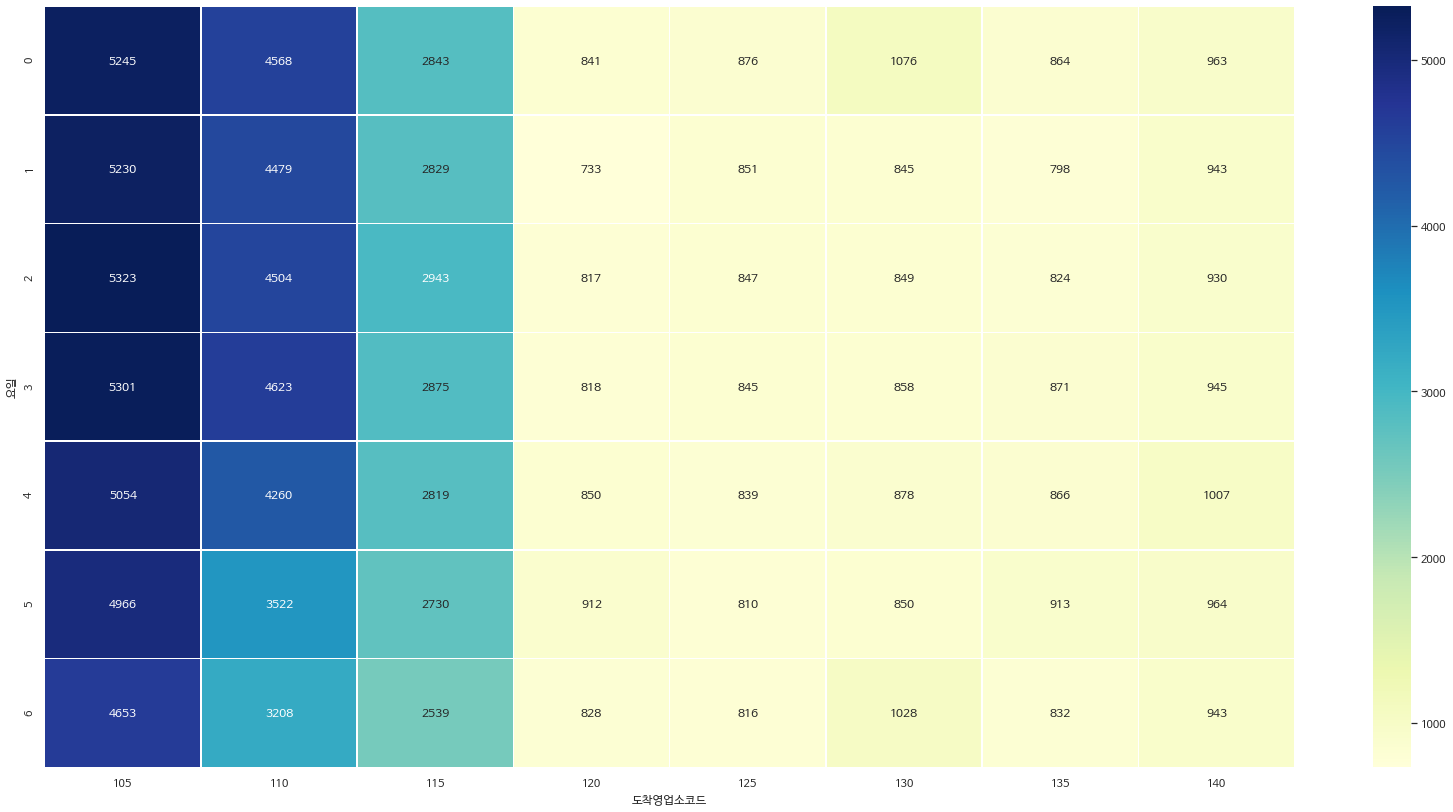

In [44]:
# Draw a heatmap with numeric values in each cell
f, ax = plt.subplots(figsize=(28,14))
sns.heatmap(data_06_22_weekdays, annot=True, fmt= 'd', linewidths=.5, ax=ax,cmap='YlGnBu')